In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from scipy import optimize

In [2]:
df = pd.read_csv("outputs/omp_1048576actors/usa_omp_128threads_lorenz_curves_rep1.csv.gz")

In [3]:
df

,epoch,cumulative_wealth,cumulative_actors
0,0,0.000000,0.000000
1,0,0.000000,0.000000
2,0,0.000000,0.000000
3,0,0.000000,0.000000
4,0,0.000000,0.000000
...,...,...,...
187,255,0.000018,0.000215
188,255,0.000000,0.000000
189,255,0.000000,0.000000
190,255,0.000000,0.000000


Gini: 1.053
Gini: 0.391


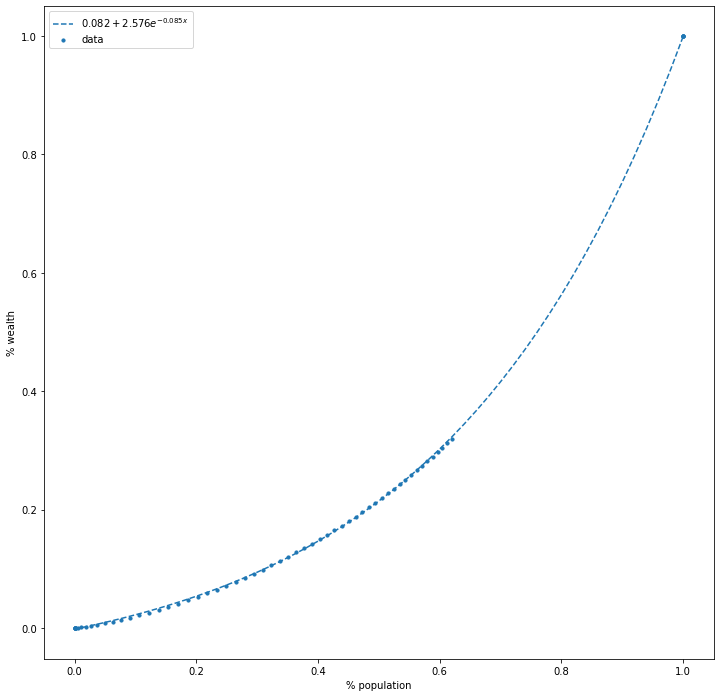

In [4]:
df = pd.read_csv("outputs/omp_1048576actors/usa_omp_128threads_lorenz_curves_rep1.csv.gz")

EPOCH = 255

def fit_func(x, a, b, c):
    return c+a*np.exp(b*x)

fig, axes = plt.subplots(figsize=(12,12))

x_values = df[df.epoch == EPOCH].cumulative_actors.values
y_values = df[df.epoch == EPOCH].cumulative_wealth.values

axes.scatter(x_values, y_values, label="data", s=10);

(fit_a, fit_b, fit_c), _ = optimize.curve_fit(fit_func, x_values, y_values) # p0=(4, 0.1)
axes.plot(
    np.linspace(0, 1, 51), 
    fit_func(np.linspace(0, 1, 51), a=fit_a, b=fit_b, c=fit_c), 
    "--", 
    label=r"$%0.3f+%0.3fe^{%0.3fx}$" % (fit_a, fit_b, fit_c)
);
axes.legend();

axes.set_xlabel("% population");
axes.set_ylabel("% wealth");
print("Gini: {:0.3f}".format((0.5-np.trapz(y_values, x=x_values))/0.5))
print("Gini: {:0.3f}".format(
    (0.5-np.trapz(fit_func(np.linspace(0, 1, 10001), fit_a, fit_b, fit_c), x=np.linspace(0, 1, 10001)))/0.5)
)

Gini: 0.352
Gini: 0.391


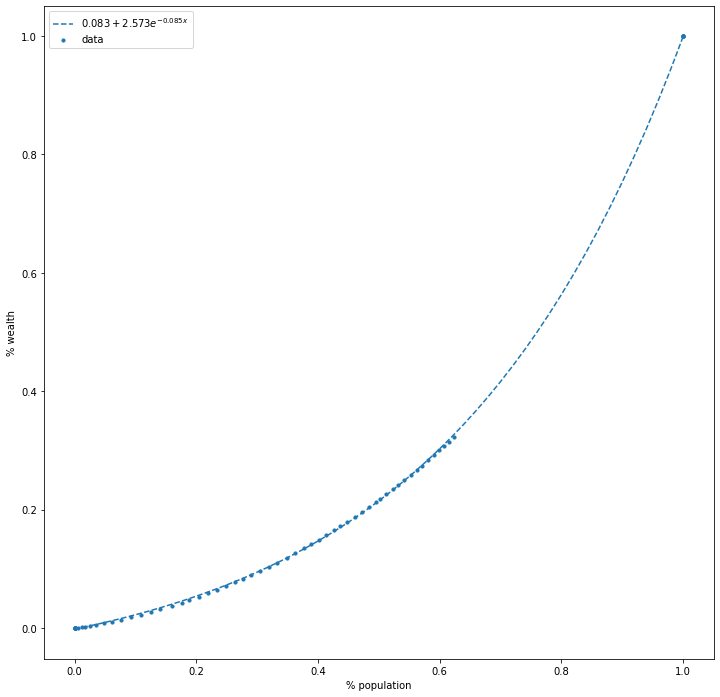

In [5]:
df = pd.read_csv("outputs/serial_8192actors/usa_serial_lorenz_curves_rep1.csv.gz")

EPOCH = 255

def fit_func(x, a, b, c):
    return c+a*np.exp(b*x)

fig, axes = plt.subplots(figsize=(12,12))

x_values = df[df.epoch == EPOCH].cumulative_actors.values
y_values = df[df.epoch == EPOCH].cumulative_wealth.values

axes.scatter(x_values, y_values, label="data", s=10);

(fit_a, fit_b, fit_c), _ = optimize.curve_fit(fit_func, x_values, y_values) # p0=(4, 0.1)
axes.plot(
    np.linspace(0, 1, 51), 
    fit_func(np.linspace(0, 1, 51), a=fit_a, b=fit_b, c=fit_c), 
    "--", 
    label=r"$%0.3f+%0.3fe^{%0.3fx}$" % (fit_a, fit_b, fit_c)
);
axes.legend();

axes.set_xlabel("% population");
axes.set_ylabel("% wealth");
print("Gini: {:0.3f}".format((0.5-np.trapz(y_values, x=x_values))/0.5))
print("Gini: {:0.3f}".format(
    (0.5-np.trapz(fit_func(np.linspace(0, 1, 10001), fit_a, fit_b, fit_c), x=np.linspace(0, 1, 10001)))/0.5)
)

In [6]:
runtimes_ms = {}

for runtimes_txt in glob.glob("outputs/omp_1048576actors/*.txt"):
    with open(runtimes_txt, "r") as f_in:
        runtimes_ns = pd.Series(f_in.readlines()).str.split("\n").str.get(0).astype(float)
        runtimes_ms["_".join(runtimes_txt.split("_")[2:4])] = runtimes_ns.values/1e6
        
# for runtimes_txt in glob.glob("outputs/omp_simple/*.txt"):
#     split_string = runtimes_txt.split("_")[2:4]
#     split_string.insert(1, "simple")
#     with open(runtimes_txt, "r") as f_in:
#         runtimes_ns = pd.Series(f_in.readlines()).str.split("\n").str.get(0).astype(float)
#         runtimes_ms["_".join(split_string)] = runtimes_ns.values/1e6
        
with open("outputs/serial_1048576actors/usa_serial_runtimes.txt", "r") as f_in:
    runtimes_ns = pd.Series(f_in.readlines()).str.split("\n").str.get(0).astype(float)
    runtimes_ms["serial"] = runtimes_ns.values/1e6

In [7]:
def runtime_point(axes, runtimes, n_threads, color="k", marker="o"):

    # Min/max range
    min_max = axes.errorbar(
        n_threads, 0.5*(np.max(runtimes)+np.min(runtimes)), 
        0.5*(np.max(runtimes)-np.min(runtimes)),
        linestyle="", capsize=5, color=color, alpha=0.5, 
    );
    # Mean +- std
    mean_std = axes.errorbar(
        n_threads, np.mean(runtimes), 
        np.std(runtimes),
        linestyle="", linewidth=3, marker=marker, markersize=5, color=color, 
    );
    return min_max, mean_std

In [8]:
runtimes_ms

{'omp_1thread': array([11452.881633, 11451.373776, 11467.214031, 11459.153706,
        11459.944649, 11453.714916, 11443.206469, 11467.090482,
        11462.901622, 11436.051982]),
 'omp_2threads': array([11654.398917, 11659.016304, 11658.63544 , 11647.212295,
        11660.186652, 11658.555391, 11663.815045, 11677.821529,
        11686.980723, 11686.216729]),
 'omp_8threads': array([11979.00452 , 12010.760644, 12039.577355, 12021.209569,
        12012.659123, 12018.715302, 12048.332398, 12029.805146,
        12030.507558, 12038.288745]),
 'omp_128threads': array([14801.650395, 14743.135696, 14818.071696, 14728.536011,
        14815.194127, 14770.984014, 14784.64588 , 14719.627445,
        14766.36447 , 14748.9645  , 14771.67911 , 14748.147761,
        14751.119912]),
 'omp_32threads': array([12792.344487, 12803.489236, 12785.146248, 12819.671146,
        12797.231526, 12809.396426, 12807.504162, 12795.156061,
        12810.764889, 12791.851331]),
 'serial': array([11389.827576, 11366.

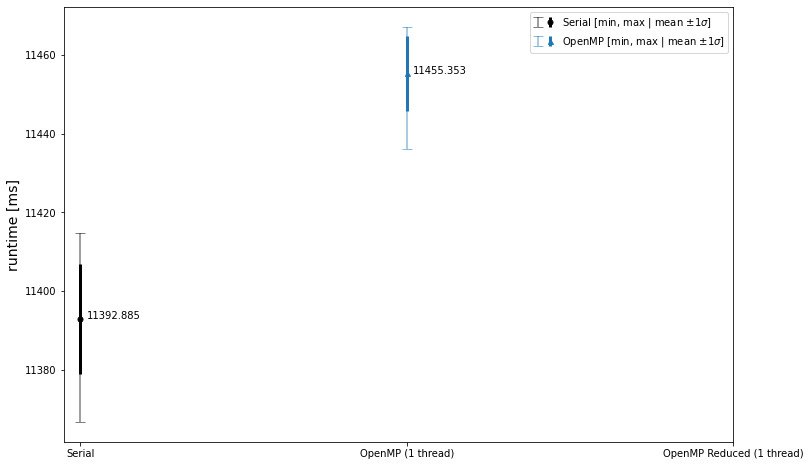

In [9]:
fig, axes = plt.subplots(figsize=(12, 8))

plot_handles = []
plot_labels = []
    
handles = runtime_point(axes, runtimes_ms["serial"], 0);
plot_handles.append(handles)
plot_labels.append("Serial [min, max | mean $\pm1\sigma$]")
axes.text(0.02, np.mean(runtimes_ms["serial"]), "{:0.3f}".format(np.mean(runtimes_ms["serial"])))

handles = runtime_point(axes, runtimes_ms["omp_1thread"], 1, marker="^", color="C0");
plot_handles.append(handles)
plot_labels.append("OpenMP [min, max | mean $\pm1\sigma$]")
axes.text(1.02, np.mean(runtimes_ms["omp_1thread"]), "{:0.3f}".format(np.mean(runtimes_ms["omp_1thread"])))

# handles = runtime_point(axes, runtimes_ms["omp_simple_1thread"], 2, marker="s", color="C1");
# plot_handles.append(handles)
# plot_labels.append("OpenMP Reduced [min, max | mean $\pm1\sigma$]")
# axes.text(
#     1.98, 
#     np.mean(runtimes_ms["omp_simple_1thread"]), 
#     "{:0.3f}".format(np.mean(runtimes_ms["omp_simple_1thread"])),
#     horizontalalignment="right"
# )

# Legend
axes.legend(
    plot_handles, plot_labels, 
    handler_map={tuple: HandlerTuple(ndivide=None)}
);

axes.set_xticks([0, 1, 2])
axes.set_xticklabels(["Serial", "OpenMP (1 thread)", "OpenMP Reduced (1 thread)"])

axes.set_ylabel("runtime [ms]", size=14);

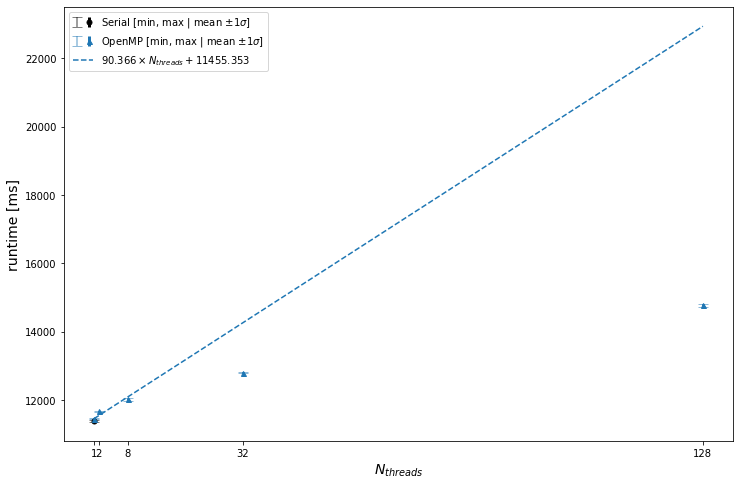

In [10]:
fig, axes = plt.subplots(figsize=(12, 8))

to_fit = []
plot_handles = []
plot_labels = []
    
handles = runtime_point(axes, runtimes_ms["serial"], 1);
plot_handles.append(handles)
plot_labels.append("Serial [min, max | mean $\pm1\sigma$]")

handles = runtime_point(axes, runtimes_ms["omp_1thread"], 1, marker="^", color="C0");
to_fit.append(runtimes_ms["omp_1thread"])
plot_handles.append(handles)
plot_labels.append("OpenMP [min, max | mean $\pm1\sigma$]")

# handles = runtime_point(axes, runtimes_ms["omp_simple_1thread"], 1, marker="s", color="C1");
# plot_handles.append(handles)
# plot_labels.append("OpenMP Reduced [min, max | mean $\pm1\sigma$]")

# tests = [2**a for a in range(1, 8)]
tests = [2, 8, 32, 128]

for n_threads in tests:
    runtime_point(axes, runtimes_ms[f"omp_{n_threads}threads"], n_threads, marker="^", color="C0");
#     runtime_point(axes, runtimes_ms[f"omp_simple_{n_threads}threads"], n_threads, marker="s", color="C1");
    to_fit.append(runtimes_ms[f"omp_{n_threads}threads"])

axes.set_xticks([1]+tests)

axes.set_xlabel(r"$N_{threads}$", size=14);
axes.set_ylabel("runtime [ms]", size=14);

def fit_func(x, m):
    return m*(x-1)+np.mean(runtimes_ms["omp_1thread"])

# (fit_m), _ = optimize.curve_fit(
#     fit_func, 
#     [1]+tests,
#     [np.mean(r) for r in to_fit], 
# )

handle, = axes.plot([1]+tests, fit_func(np.array([1]+tests), 90.366), "--");
plot_handles.append(handle)
plot_labels.append("$%0.3f \\times N_{threads} + %0.3f$" % (90.366, np.mean(runtimes_ms["omp_1thread"])))

# Legend
axes.legend(
    plot_handles, plot_labels, 
    handler_map={tuple: HandlerTuple(ndivide=None)}
);